In [2]:
# import dependencies
from keras import backend as K
from sklearn.datasets import make_blobs
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

In [3]:
# generate a toy dataset of only two features and four label classes
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, cluster_std=2, random_state=2)

In [4]:
# let's take a look at the label (y) before one-hot encoding
y

array([2, 2, 2, 1, 1, 0, 1, 2, 3, 2, 1, 0, 1, 0, 0, 2, 2, 3, 2, 1, 3, 0,
       0, 3, 1, 3, 3, 3, 0, 2, 0, 0, 2, 3, 1, 0, 1, 2, 2, 1, 3, 3, 1, 2,
       3, 0, 0, 1, 1, 0, 0, 3, 0, 3, 2, 3, 3, 0, 2, 1, 3, 1, 3, 0, 1, 3,
       0, 1, 3, 0, 2, 1, 3, 3, 2, 2, 1, 1, 3, 2, 3, 1, 2, 2, 0, 2, 3, 3,
       1, 2, 3, 0, 2, 0, 1, 2, 2, 0, 3, 0, 3, 3, 3, 1, 1, 2, 2, 1, 0, 3,
       0, 3, 1, 3, 0, 0, 0, 0, 2, 2, 0, 3, 0, 2, 1, 2, 3, 0, 1, 0, 2, 0,
       0, 0, 1, 0, 3, 2, 1, 1, 3, 1, 0, 2, 3, 3, 1, 1, 1, 3, 1, 1, 3, 0,
       1, 1, 1, 3, 2, 2, 0, 2, 1, 2, 0, 2, 0, 1, 1, 2, 1, 3, 3, 0, 3, 2,
       1, 2, 2, 3, 3, 0, 2, 2, 2, 1, 2, 1, 0, 0, 1, 3, 2, 2, 1, 0, 3, 2,
       3, 3, 3, 3, 3, 2, 3, 1, 2, 3, 0, 2, 0, 2, 3, 3, 0, 3, 0, 3, 0, 3,
       2, 3, 3, 0, 2, 1, 1, 1, 3, 3, 2, 1, 3, 3, 3, 3, 2, 0, 2, 3, 1, 1,
       3, 2, 0, 0, 2, 0, 2, 1, 0, 3, 1, 1, 1, 0, 1, 2, 3, 1, 2, 1, 2, 2,
       2, 0, 2, 0, 3, 2, 1, 0, 1, 1, 0, 2, 0, 2, 1, 0, 3, 2, 3, 1, 3, 0,
       2, 0, 2, 3, 2, 1, 3, 1, 2, 1, 2, 0, 3, 0, 3,

In [5]:
# one-hot encode output variable
y = np_utils.to_categorical(y)
print(y)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [6]:
# split into 80% training data and 20% test data 
# note that we did not create a validation dataset in this example for simplicity
n_train = 800
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape)

(800, 2) (200, 2)


In [7]:
# develop the baseline model architecture
# here we are building a very simple, two-layer network
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(4, activation='softmax')) # four hidden units because we have 4 label classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 4)                 104       
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


In [8]:
# train the model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=1)

Epoch 1/500
25/25 [==============================] - 2s 7ms/step - loss: 1.2259 - accuracy: 0.5063 - val_loss: 1.0456 - val_accuracy: 0.5500
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.9308 - accuracy: 0.6175 - val_loss: 0.8570 - val_accuracy: 0.6450
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.7990 - accuracy: 0.6400 - val_loss: 0.7664 - val_accuracy: 0.6550
Epoch 4/500
25/25 [==============================] - 0s 4ms/step - loss: 0.7226 - accuracy: 0.6825 - val_loss: 0.7164 - val_accuracy: 0.7250
Epoch 5/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6762 - accuracy: 0.7325 - val_loss: 0.6822 - val_accuracy: 0.7350
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6442 - accuracy: 0.7412 - val_loss: 0.6573 - val_accuracy: 0.7350
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7525 - val_loss: 0.6388 - val_accuracy: 0.7550
Epoch 8/500
2

Epoch 59/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8525 - val_loss: 0.4037 - val_accuracy: 0.8300
Epoch 60/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3653 - accuracy: 0.8562 - val_loss: 0.4018 - val_accuracy: 0.8300
Epoch 61/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.8562 - val_loss: 0.4009 - val_accuracy: 0.8250
Epoch 62/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 0.8562 - val_loss: 0.4003 - val_accuracy: 0.8250
Epoch 63/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3643 - accuracy: 0.8562 - val_loss: 0.4010 - val_accuracy: 0.8350
Epoch 64/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.8562 - val_loss: 0.4005 - val_accuracy: 0.8250
Epoch 65/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8550 - val_loss: 0.3968 - val_accuracy: 0.8300
Epoch 

25/25 [==============================] - 0s 3ms/step - loss: 0.3495 - accuracy: 0.8612 - val_loss: 0.3818 - val_accuracy: 0.8350
Epoch 117/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8600 - val_loss: 0.3812 - val_accuracy: 0.8350
Epoch 118/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8562 - val_loss: 0.3821 - val_accuracy: 0.8350
Epoch 119/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8587 - val_loss: 0.3791 - val_accuracy: 0.8350
Epoch 120/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8612 - val_loss: 0.3803 - val_accuracy: 0.8350
Epoch 121/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3495 - accuracy: 0.8612 - val_loss: 0.3801 - val_accuracy: 0.8300
Epoch 122/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8600 - val_loss: 0.3798 - val_accuracy: 0.8300
Epoch 123/500

25/25 [==============================] - 0s 3ms/step - loss: 0.3475 - accuracy: 0.8600 - val_loss: 0.3773 - val_accuracy: 0.8400
Epoch 174/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.8587 - val_loss: 0.3786 - val_accuracy: 0.8300
Epoch 175/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8587 - val_loss: 0.3768 - val_accuracy: 0.8350
Epoch 176/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3472 - accuracy: 0.8575 - val_loss: 0.3767 - val_accuracy: 0.8350
Epoch 177/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8587 - val_loss: 0.3784 - val_accuracy: 0.8250
Epoch 178/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3476 - accuracy: 0.8612 - val_loss: 0.3769 - val_accuracy: 0.8350
Epoch 179/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3470 - accuracy: 0.8575 - val_loss: 0.3796 - val_accuracy: 0.8200
Epoch 180/500

25/25 [==============================] - 0s 4ms/step - loss: 0.3454 - accuracy: 0.8587 - val_loss: 0.3757 - val_accuracy: 0.8300
Epoch 231/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3450 - accuracy: 0.8600 - val_loss: 0.3775 - val_accuracy: 0.8250
Epoch 232/500
25/25 [==============================] - 0s 4ms/step - loss: 0.3456 - accuracy: 0.8600 - val_loss: 0.3796 - val_accuracy: 0.8250
Epoch 233/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3468 - accuracy: 0.8600 - val_loss: 0.3787 - val_accuracy: 0.8250
Epoch 234/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.8612 - val_loss: 0.3779 - val_accuracy: 0.8300
Epoch 235/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.8612 - val_loss: 0.3776 - val_accuracy: 0.8250
Epoch 236/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.8575 - val_loss: 0.3772 - val_accuracy: 0.8250
Epoch 237/500

25/25 [==============================] - 0s 2ms/step - loss: 0.3442 - accuracy: 0.8600 - val_loss: 0.3801 - val_accuracy: 0.8300
Epoch 288/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8625 - val_loss: 0.3793 - val_accuracy: 0.8200
Epoch 289/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8612 - val_loss: 0.3783 - val_accuracy: 0.8200
Epoch 290/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8600 - val_loss: 0.3768 - val_accuracy: 0.8250
Epoch 291/500
25/25 [==============================] - 0s 1ms/step - loss: 0.3448 - accuracy: 0.8600 - val_loss: 0.3773 - val_accuracy: 0.8300
Epoch 292/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.8612 - val_loss: 0.3770 - val_accuracy: 0.8200
Epoch 293/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.8625 - val_loss: 0.3785 - val_accuracy: 0.8200
Epoch 294/500

25/25 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8637 - val_loss: 0.3801 - val_accuracy: 0.8200
Epoch 345/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8625 - val_loss: 0.3776 - val_accuracy: 0.8200
Epoch 346/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3441 - accuracy: 0.8600 - val_loss: 0.3789 - val_accuracy: 0.8250
Epoch 347/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8612 - val_loss: 0.3769 - val_accuracy: 0.8400
Epoch 348/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8625 - val_loss: 0.3798 - val_accuracy: 0.8200
Epoch 349/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8637 - val_loss: 0.3777 - val_accuracy: 0.8200
Epoch 350/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8600 - val_loss: 0.3757 - val_accuracy: 0.8200
Epoch 351/500

25/25 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.8587 - val_loss: 0.3811 - val_accuracy: 0.8200
Epoch 402/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8625 - val_loss: 0.3798 - val_accuracy: 0.8150
Epoch 403/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3414 - accuracy: 0.8575 - val_loss: 0.3804 - val_accuracy: 0.8150
Epoch 404/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8625 - val_loss: 0.3795 - val_accuracy: 0.8150
Epoch 405/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.8587 - val_loss: 0.3792 - val_accuracy: 0.8150
Epoch 406/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.8587 - val_loss: 0.3826 - val_accuracy: 0.8250
Epoch 407/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3422 - accuracy: 0.8625 - val_loss: 0.3784 - val_accuracy: 0.8200
Epoch 408/500

25/25 [==============================] - 0s 3ms/step - loss: 0.3409 - accuracy: 0.8612 - val_loss: 0.3818 - val_accuracy: 0.8150
Epoch 459/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3407 - accuracy: 0.8625 - val_loss: 0.3817 - val_accuracy: 0.8150
Epoch 460/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3408 - accuracy: 0.8637 - val_loss: 0.3790 - val_accuracy: 0.8150
Epoch 461/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3419 - accuracy: 0.8612 - val_loss: 0.3811 - val_accuracy: 0.8150
Epoch 462/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3412 - accuracy: 0.8637 - val_loss: 0.3823 - val_accuracy: 0.8150
Epoch 463/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3432 - accuracy: 0.8612 - val_loss: 0.3803 - val_accuracy: 0.8200
Epoch 464/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.8600 - val_loss: 0.3822 - val_accuracy: 0.8100
Epoch 465/500

In [9]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.864, Test: 0.815


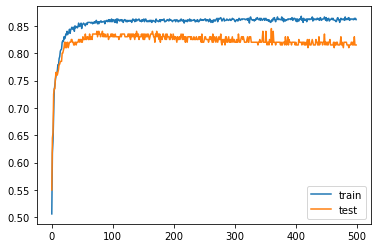

In [10]:
# plot learning curves of model accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()